In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

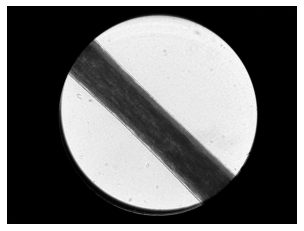

In [2]:
path = '../datasets/Human Hair'
img_path = path + '/frame74.jpg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
#img = cv.imread(f'../results/{dataset}/Depthmap-FIJI.tif', cv.IMREAD_GRAYSCALE)
#cv.imshow('image', img)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.axis('off')
plt.imshow(img, cmap='gray')

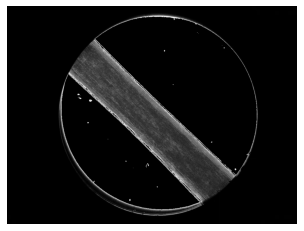

In [3]:
retval, dst = cv.threshold(img, 200, 255, cv.THRESH_TOZERO_INV)
plt.axis('off')
plt.imshow(dst, cmap='gray')



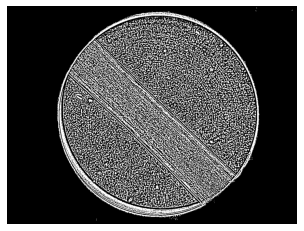

In [4]:
dst = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 7, 1)
plt.axis('off')
plt.imshow(dst, cmap='gray')

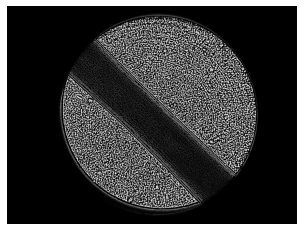

In [5]:
applied_mask = cv.bitwise_and(img, img, mask=dst)
plt.axis('off')
plt.imshow(applied_mask, cmap='gray')


In [6]:
#cv.imwrite("results/18/Depthmap-threshold.png", applied_mask)

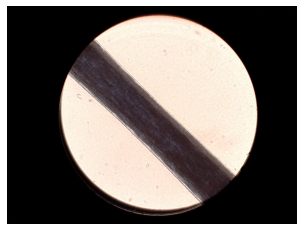

In [7]:
#img_texture = cv.imread(f'../results/{dataset}/Texture-ZS.jpg', cv.IMREAD_COLOR)
img_texture = cv.imread(img_path, cv.IMREAD_COLOR)
plt.axis('off')
plt.imshow(img_texture)
#cv.imshow('image', img_texture)
#cv.waitKey(0)
#cv.destroyAllWindows()


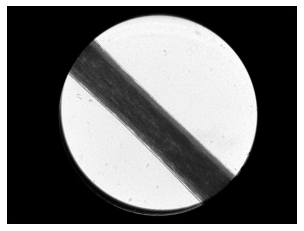

In [8]:
grayscaled_texture = cv.cvtColor(img_texture, cv.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(grayscaled_texture, cmap='gray')

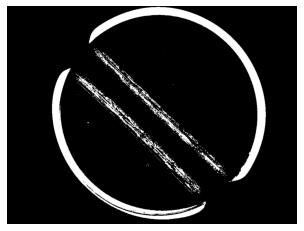

In [9]:
mask = cv.adaptiveThreshold(grayscaled_texture, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 91, 40)
plt.axis('off')
plt.imshow(mask, cmap='gray')

# cv.imshow('mask', mask)
# cv.waitKey(0)
# cv.destroyAllWindows()

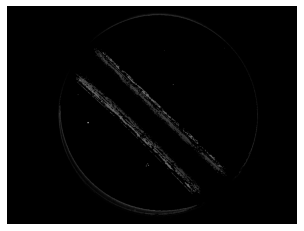

In [10]:
applied_mask_to_texture = cv.bitwise_and(img, img, mask=mask)
plt.axis('off')
plt.imshow(applied_mask_to_texture, cmap='gray')
#cv.imwrite('results/18/Depthmap-threshold.png', applied_mask_to_texture)

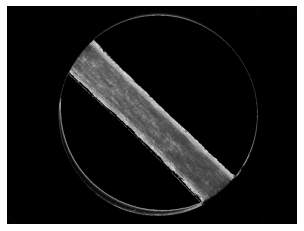

In [11]:
th, mask_otsu = cv.threshold(grayscaled_texture, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.imshow(mask_otsu, cmap='gray')
applied_otsu_mask_to_texture = cv.bitwise_and(img, img, mask=mask_otsu)
plt.axis('off')
plt.imshow(applied_otsu_mask_to_texture, cmap='gray')
#cv.imwrite('results/18/Depthmap-otsu.png', applied_otsu_mask_to_texture)

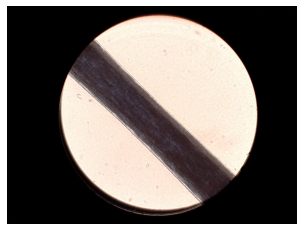

In [12]:
plt.axis('off')
plt.imshow(img_texture)

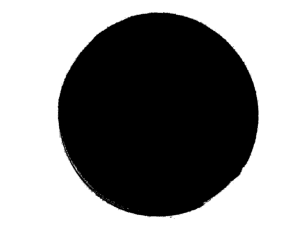

In [13]:
# 2 is an empiric value
glob_threshold = 2
threshold, thresholded_img = cv.threshold(grayscaled_texture, glob_threshold, 255, cv.THRESH_BINARY_INV)
plt.axis('off')
plt.imshow(thresholded_img, cmap='gray')


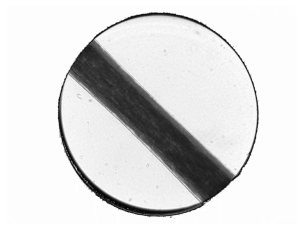

In [14]:
#
minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(grayscaled_texture)

# making sure that grayscaled_texture (<glob_threshold) + 255 * coeff < 255
coeff = np.min([maxVal / 255, 1 - glob_threshold / 255])


added = cv.addWeighted(grayscaled_texture, 1, thresholded_img, coeff, 0)
plt.axis('off')
plt.imshow(added, cmap='gray')

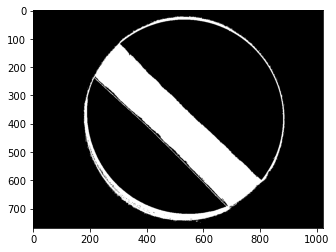

In [15]:
# apply otsu's binarization to the texture
th, mask = cv.threshold(added, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.imshow(mask, cmap='gray')

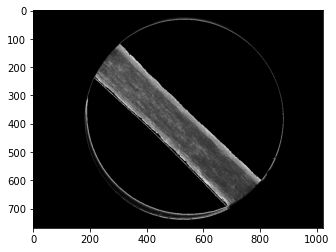

In [16]:
# apply mask to the depthmap and save the result
masked_depth_map = cv.bitwise_and(img, img, mask=mask)
plt.imshow(masked_depth_map, cmap='gray')

In [17]:
# cv.imwrite('results/18/Depthmap-OTSU.png', masked_depth_map)